## Final Project - Predicitability of In Vehicle Coupon Acceptance  
        

## Rohith Ediga - 900796545

### Importing Necessary Libraries 

In [22]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
import random
import matplotlib.cm as cm
import seaborn
import sklearn
import scipy
import scipy.stats as stats
%matplotlib inline


In [24]:
from sklearn import base
from collections import defaultdict
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, KernelPCA
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

### Getting Data 

In [25]:
data = pd.read_csv(r'C:\Users\student\Desktop\MS project\vehicle_recommendation.csv')

In [5]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [26]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [27]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [28]:
data.count()

destination             12684
passanger               12684
weather                 12684
temperature             12684
time                    12684
coupon                  12684
expiration              12684
gender                  12684
age                     12684
maritalStatus           12684
has_children            12684
education               12684
occupation              12684
income                  12684
car                       108
Bar                     12577
CoffeeHouse             12467
CarryAway               12533
RestaurantLessThan20    12554
Restaurant20To50        12495
toCoupon_GEQ5min        12684
toCoupon_GEQ15min       12684
toCoupon_GEQ25min       12684
direction_same          12684
direction_opp           12684
Y                       12684
dtype: int64

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [31]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

#### Removing variable car as it  has more NA's nearly 99%. 

In [32]:
data.drop(columns=['car'], inplace=True)

In [12]:
data.select_dtypes('object').nunique()

destination              3
passanger                4
weather                  3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
education                6
occupation              25
income                   9
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
dtype: int64

In [33]:
data.select_dtypes('int64').nunique()

temperature          3
has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

##### Dropping toCoupon_GEQ5min it means that how far the restaurants are. As it has only one category it means all the restaurants are atleast 5 mins far away.

In [34]:
data.drop(columns=['toCoupon_GEQ5min'], inplace=True)

### Categorical Features 

In [35]:
for i in data.select_dtypes('object').columns:
    print(i, data[i].unique())

destination ['No Urgent Place' 'Home' 'Work']
passanger ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather ['Sunny' 'Rainy' 'Snowy']
time ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration ['1d' '2h']
gender ['Female' 'Male']
age ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
education ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Constr

### Numerical variables 

In [36]:
for i in data.select_dtypes('int64').columns:
    print(i, data[i].unique())

temperature [55 80 30]
has_children [1 0]
toCoupon_GEQ15min [0 1]
toCoupon_GEQ25min [0 1]
direction_same [0 1]
direction_opp [1 0]
Y [1 0]


In [37]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,1,0


## Exploratory Data Analysis  

#### Lets see how the variables are distrubuted  

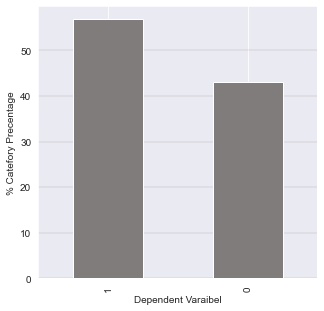

1    7210
0    5474
Name: Y, dtype: int64

In [38]:
(data.Y.value_counts(normalize=True)*100).plot.bar(color = '#807c7c',figsize=(5, 5))
plt.grid(color='#807c7c', linestyle='-', linewidth=2, axis='y', alpha=0.1)
plt.xlabel('Dependent Varaibel')
plt.ylabel('% Catefory Precentage')
plt.show()
dep_var = data.Y.value_counts()
dep_var

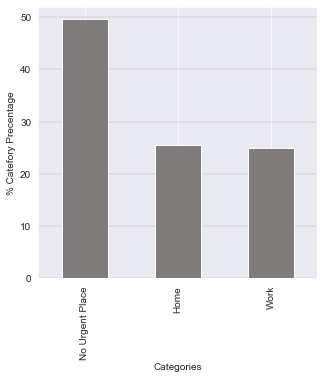

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64

In [39]:
(data.destination.value_counts(normalize=True)*100).plot.bar(color = '#807c7c',figsize=(5, 5))
plt.grid(color='#807c7c', linestyle='-', linewidth=2, axis='y', alpha=0.1)
plt.xlabel('Categories')
plt.ylabel('% Catefory Precentage')
plt.show()
data.destination.value_counts()

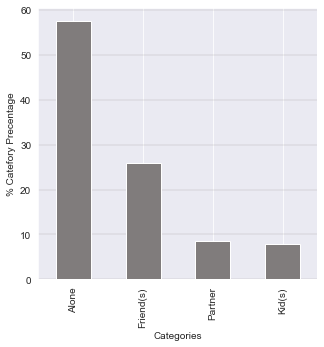

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64

In [40]:
(data.passanger.value_counts(normalize=True)*100).plot.bar(color = '#807c7c',figsize=(5, 5))
plt.grid(color='#807c7c', linestyle='-', linewidth=2, axis='y', alpha=0.1)
plt.xlabel('Categories')
plt.ylabel('% Catefory Precentage')
plt.show()
data.passanger.value_counts()

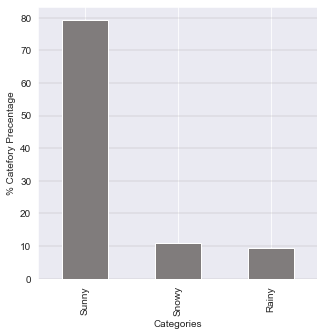

Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64

In [41]:
(data.weather.value_counts(normalize=True)*100).plot.bar(color = '#807c7c',figsize=(5, 5))
plt.grid(color='#807c7c', linestyle='-', linewidth=2, axis='y', alpha=0.1)
plt.xlabel('Categories')
plt.ylabel('% Catefory Precentage')
plt.show()
data.weather.value_counts()

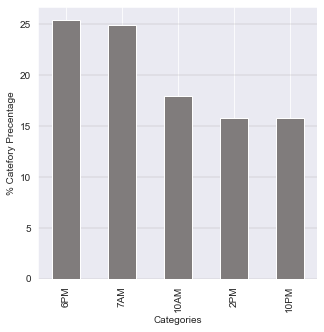

6PM     25.465153
7AM     24.944812
10AM    17.935982
2PM     15.838852
10PM    15.815200
Name: time, dtype: float64

In [42]:
(data.time.value_counts(normalize=True)*100).plot.bar(color = '#807c7c',figsize=(5, 5))
plt.grid(color='#807c7c', linestyle='-', linewidth=2, axis='y', alpha=0.1)
plt.xlabel('Categories')
plt.ylabel('% Catefory Precentage')
plt.show()
data.time.value_counts()/len(data.time)*100

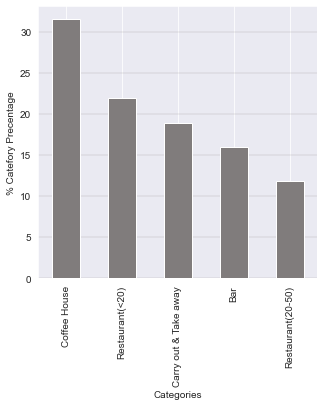

Coffee House             31.504257
Restaurant(<20)          21.964680
Carry out & Take away    18.866288
Bar                      15.901924
Restaurant(20-50)        11.762851
Name: coupon, dtype: float64

In [43]:
(data.coupon.value_counts(normalize=True)*100).plot.bar(color = '#807c7c',figsize=(5, 5))
plt.grid(color='#807c7c', linestyle='-', linewidth=2, axis='y', alpha=0.1)
plt.xlabel('Categories')
plt.ylabel('% Catefory Precentage')
plt.show()
data.coupon.value_counts()/len(data.coupon)*100

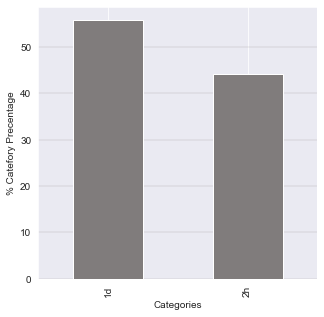

1d    55.905077
2h    44.094923
Name: expiration, dtype: float64

In [44]:
(data.expiration.value_counts(normalize=True)*100).plot.bar(color = '#807c7c',figsize=(5, 5))
plt.grid(color='#807c7c', linestyle='-', linewidth=2, axis='y', alpha=0.1)
plt.xlabel('Categories')
plt.ylabel('% Catefory Precentage')
plt.show()
data.expiration.value_counts()/len(data.expiration)*100


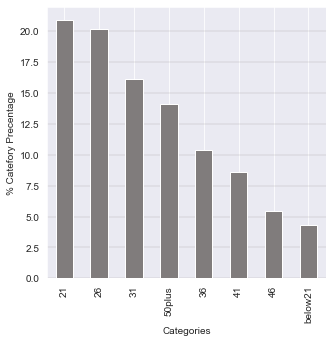

21         20.916115
26         20.175024
31         16.075371
50plus     14.096500
36         10.398928
41          8.617155
46          5.408389
below21     4.312520
Name: age, dtype: float64

In [45]:
(data.age.value_counts(normalize=True)*100).plot.bar(color = '#807c7c',figsize=(5, 5))
plt.grid(color='#807c7c', linestyle='-', linewidth=2, axis='y', alpha=0.1)
plt.xlabel('Categories')
plt.ylabel('% Catefory Precentage')
plt.show()
data.age.value_counts()/len(data.age)*100

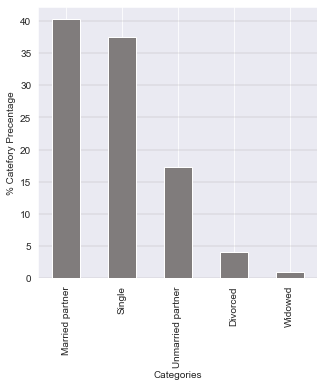

Married partner      40.208136
Single               37.464522
Unmarried partner    17.234311
Divorced              4.068117
Widowed               1.024913
Name: maritalStatus, dtype: float64

In [46]:
(data.maritalStatus.value_counts(normalize=True)*100).plot.bar(color = '#807c7c',figsize=(5, 5))
plt.grid(color='#807c7c', linestyle='-', linewidth=2, axis='y', alpha=0.1)
plt.xlabel('Categories')
plt.ylabel('% Catefory Precentage')
plt.show()
data.maritalStatus.value_counts()/len(data.maritalStatus)*100

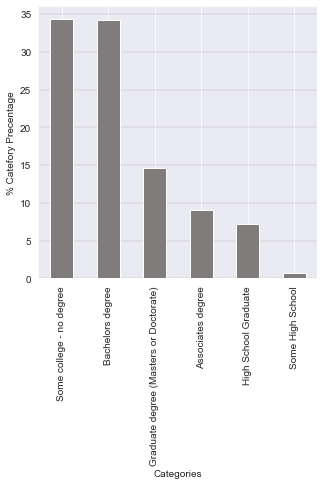

Some college - no degree                  34.303059
Bachelors degree                          34.176916
Graduate degree (Masters or Doctorate)    14.601072
Associates degree                          9.090192
High School Graduate                       7.134973
Some High School                           0.693787
Name: education, dtype: float64

In [47]:
(data.education.value_counts(normalize=True)*100).plot.bar(color = '#807c7c',figsize=(5, 5))
plt.grid(color='#807c7c', linestyle='-', linewidth=2, axis='y', alpha=0.1)
plt.xlabel('Categories')
plt.ylabel('% Catefory Precentage')
plt.show()
data.education.value_counts()/len(data.education)*100

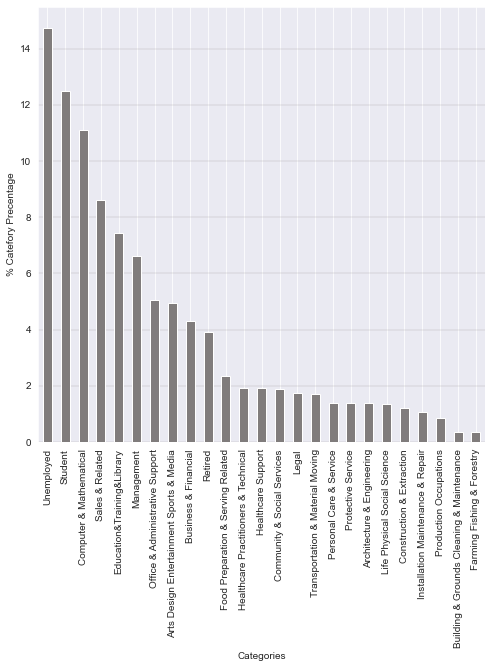

Unemployed                                   14.742983
Student                                      12.488174
Computer & Mathematical                      11.100599
Sales & Related                               8.617155
Education&Training&Library                    7.434563
Management                                    6.606749
Office & Administrative Support               5.037843
Arts Design Entertainment Sports & Media      4.959003
Business & Financial                          4.288868
Retired                                       3.902554
Food Preparation & Serving Related            2.349417
Healthcare Practitioners & Technical          1.923683
Healthcare Support                            1.907915
Community & Social Services                   1.900032
Legal                                         1.726585
Transportation & Material Moving              1.718701
Personal Care & Service                       1.379691
Protective Service                            1.379691
Architectu

In [48]:
(data.occupation.value_counts(normalize=True)*100).plot.bar(color = '#807c7c',figsize=(8, 8))
plt.grid(color='#807c7c', linestyle='-', linewidth=2, axis='y', alpha=0.1)
plt.xlabel('Categories')
plt.ylabel('% Catefory Precentage')
plt.show()
data.occupation.value_counts()/len(data.occupation)*100

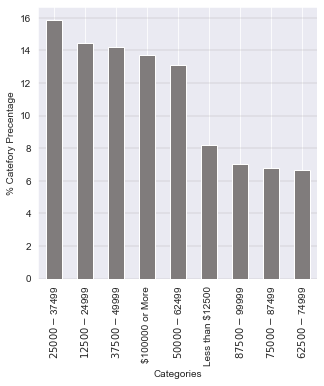

$25000 - $37499     15.870388
$12500 - $24999     14.435509
$37500 - $49999     14.230527
$100000 or More     13.686534
$50000 - $62499     13.079470
Less than $12500     8.215074
$87500 - $99999      7.056134
$75000 - $87499      6.756544
$62500 - $74999      6.669820
Name: income, dtype: float64

In [49]:
(data.income.value_counts(normalize=True)*100).plot.bar(color = '#807c7c',figsize=(5, 5))
plt.grid(color='#807c7c', linestyle='-', linewidth=2, axis='y', alpha=0.1)
plt.xlabel('Categories')
plt.ylabel('% Catefory Precentage')
plt.show()
data.income.value_counts()/len(data.income)*100

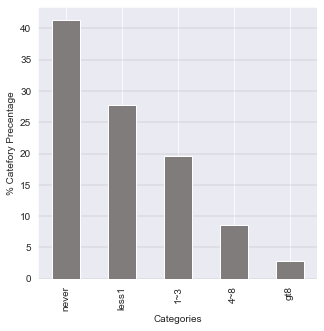

never    40.972879
less1    27.451908
1~3      19.497004
4~8       8.483128
gt8       2.751498
Name: Bar, dtype: float64

In [50]:
(data.Bar.value_counts(normalize=True)*100).plot.bar(color = '#807c7c',figsize=(5, 5))
plt.grid(color='#807c7c', linestyle='-', linewidth=2, axis='y', alpha=0.1)
plt.xlabel('Categories')
plt.ylabel('% Catefory Precentage')
plt.show()
data.Bar.value_counts()/len(data.Bar)*100

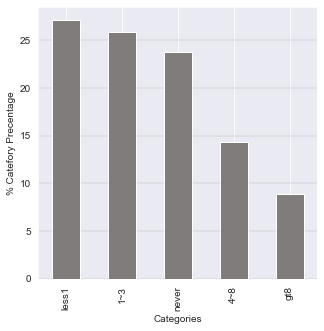

less1    26.687165
1~3      25.425733
never    23.352255
4~8      14.064964
gt8       8.759067
Name: CoffeeHouse, dtype: float64

In [51]:
(data.CoffeeHouse.value_counts(normalize=True)*100).plot.bar(color = '#807c7c',figsize=(5, 5))
plt.grid(color='#807c7c', linestyle='-', linewidth=2, axis='y', alpha=0.1)
plt.xlabel('Categories')
plt.ylabel('% Catefory Precentage')
plt.show()
data.CoffeeHouse.value_counts()/len(data.CoffeeHouse)*100

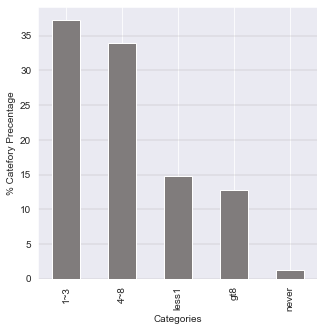

1~3      36.833806
4~8      33.569852
less1    14.632608
gt8      12.567014
never     1.206244
Name: CarryAway, dtype: float64

In [52]:
(data.CarryAway.value_counts(normalize=True)*100).plot.bar(color = '#807c7c',figsize=(5, 5))
plt.grid(color='#807c7c', linestyle='-', linewidth=2, axis='y', alpha=0.1)
plt.xlabel('Categories')
plt.ylabel('% Catefory Precentage')
plt.show()
data.CarryAway.value_counts()/len(data.CarryAway)*100

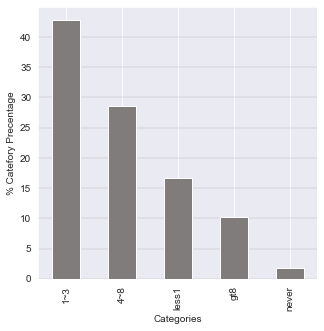

1~3      42.384106
4~8      28.224535
less1    16.501104
gt8      10.130874
never     1.734469
Name: RestaurantLessThan20, dtype: float64

In [53]:
(data.RestaurantLessThan20.value_counts(normalize=True)*100).plot.bar(color = '#807c7c',figsize=(5, 5))
plt.grid(color='#807c7c', linestyle='-', linewidth=2, axis='y', alpha=0.1)
plt.xlabel('Categories')
plt.ylabel('% Catefory Precentage')
plt.show()
data.RestaurantLessThan20.value_counts()/len(data.RestaurantLessThan20)*100

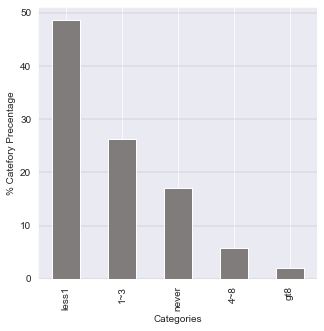

less1    47.910754
1~3      25.938190
never    16.840114
4~8       5.739514
gt8       2.081362
Name: Restaurant20To50, dtype: float64

In [54]:
(data.Restaurant20To50.value_counts(normalize=True)*100).plot.bar(color = '#807c7c',figsize=(5, 5))
plt.grid(color='#807c7c', linestyle='-', linewidth=2, axis='y', alpha=0.1)
plt.xlabel('Categories')
plt.ylabel('% Catefory Precentage')
plt.show()
data.Restaurant20To50.value_counts()/len(data.Restaurant20To50)*100

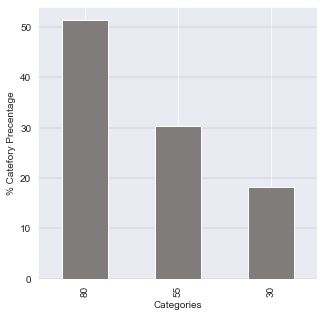

80    51.466414
55    30.274361
30    18.259224
Name: temperature, dtype: float64

In [55]:
(data.temperature.value_counts(normalize=True)*100).plot.bar(color = '#807c7c',figsize=(5, 5))
plt.grid(color='#807c7c', linestyle='-', linewidth=2, axis='y', alpha=0.1)
plt.xlabel('Categories')
plt.ylabel('% Catefory Precentage')
plt.show()
data.temperature.value_counts()/len(data.temperature)*100

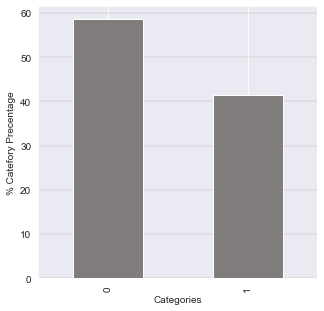

0    58.58562
1    41.41438
Name: has_children, dtype: float64

In [56]:
(data.has_children.value_counts(normalize=True)*100).plot.bar(color = '#807c7c',figsize=(5, 5))
plt.grid(color='#807c7c', linestyle='-', linewidth=2, axis='y', alpha=0.1)
plt.xlabel('Categories')
plt.ylabel('% Catefory Precentage')
plt.show()
data.has_children.value_counts()/len(data.has_children)*100

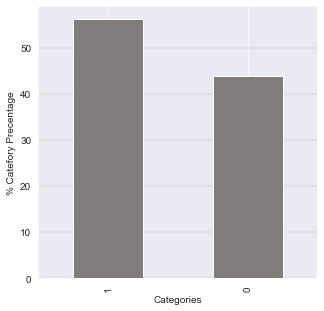

1    56.14948
0    43.85052
Name: toCoupon_GEQ15min, dtype: float64

In [57]:
(data.toCoupon_GEQ15min.value_counts(normalize=True)*100).plot.bar(color = '#807c7c',figsize=(5, 5))
plt.grid(color='#807c7c', linestyle='-', linewidth=2, axis='y', alpha=0.1)
plt.xlabel('Categories')
plt.ylabel('% Catefory Precentage')
plt.show()
data.toCoupon_GEQ15min.value_counts()/len(data.toCoupon_GEQ15min)*100

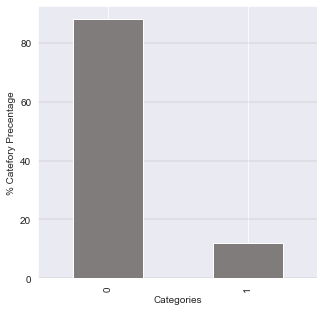

0    88.087354
1    11.912646
Name: toCoupon_GEQ25min, dtype: float64

In [58]:
(data.toCoupon_GEQ25min.value_counts(normalize=True)*100).plot.bar(color = '#807c7c',figsize=(5, 5))
plt.grid(color='#807c7c', linestyle='-', linewidth=2, axis='y', alpha=0.1)
plt.xlabel('Categories')
plt.ylabel('% Catefory Precentage')
plt.show()
data.toCoupon_GEQ25min.value_counts()/len(data.toCoupon_GEQ25min)*100

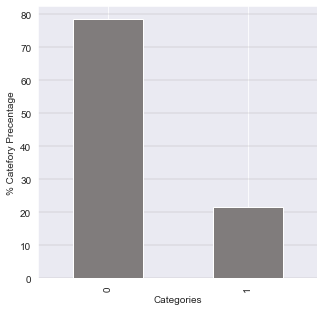

0    78.524125
1    21.475875
Name: direction_same, dtype: float64

In [59]:
(data.direction_same.value_counts(normalize=True)*100).plot.bar(color = '#807c7c',figsize=(5, 5))
plt.grid(color='#807c7c', linestyle='-', linewidth=2, axis='y', alpha=0.1)
plt.xlabel('Categories')
plt.ylabel('% Catefory Precentage')
plt.show()
data.direction_same.value_counts()/len(data.direction_same)*100

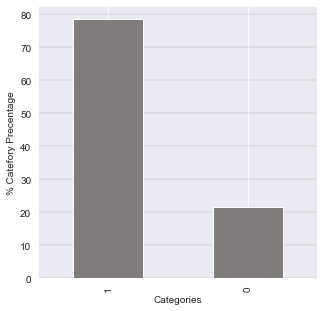

1    78.524125
0    21.475875
Name: direction_opp, dtype: float64

In [60]:
(data.direction_opp.value_counts(normalize=True)*100).plot.bar(color = '#807c7c',figsize=(5, 5))
plt.grid(color='#807c7c', linestyle='-', linewidth=2, axis='y', alpha=0.1)
plt.xlabel('Categories')
plt.ylabel('% Catefory Precentage')
plt.show()
data.direction_opp.value_counts()/len(data.direction_opp)*100

#### Examining Each Variable with respect to the predictor "Y"

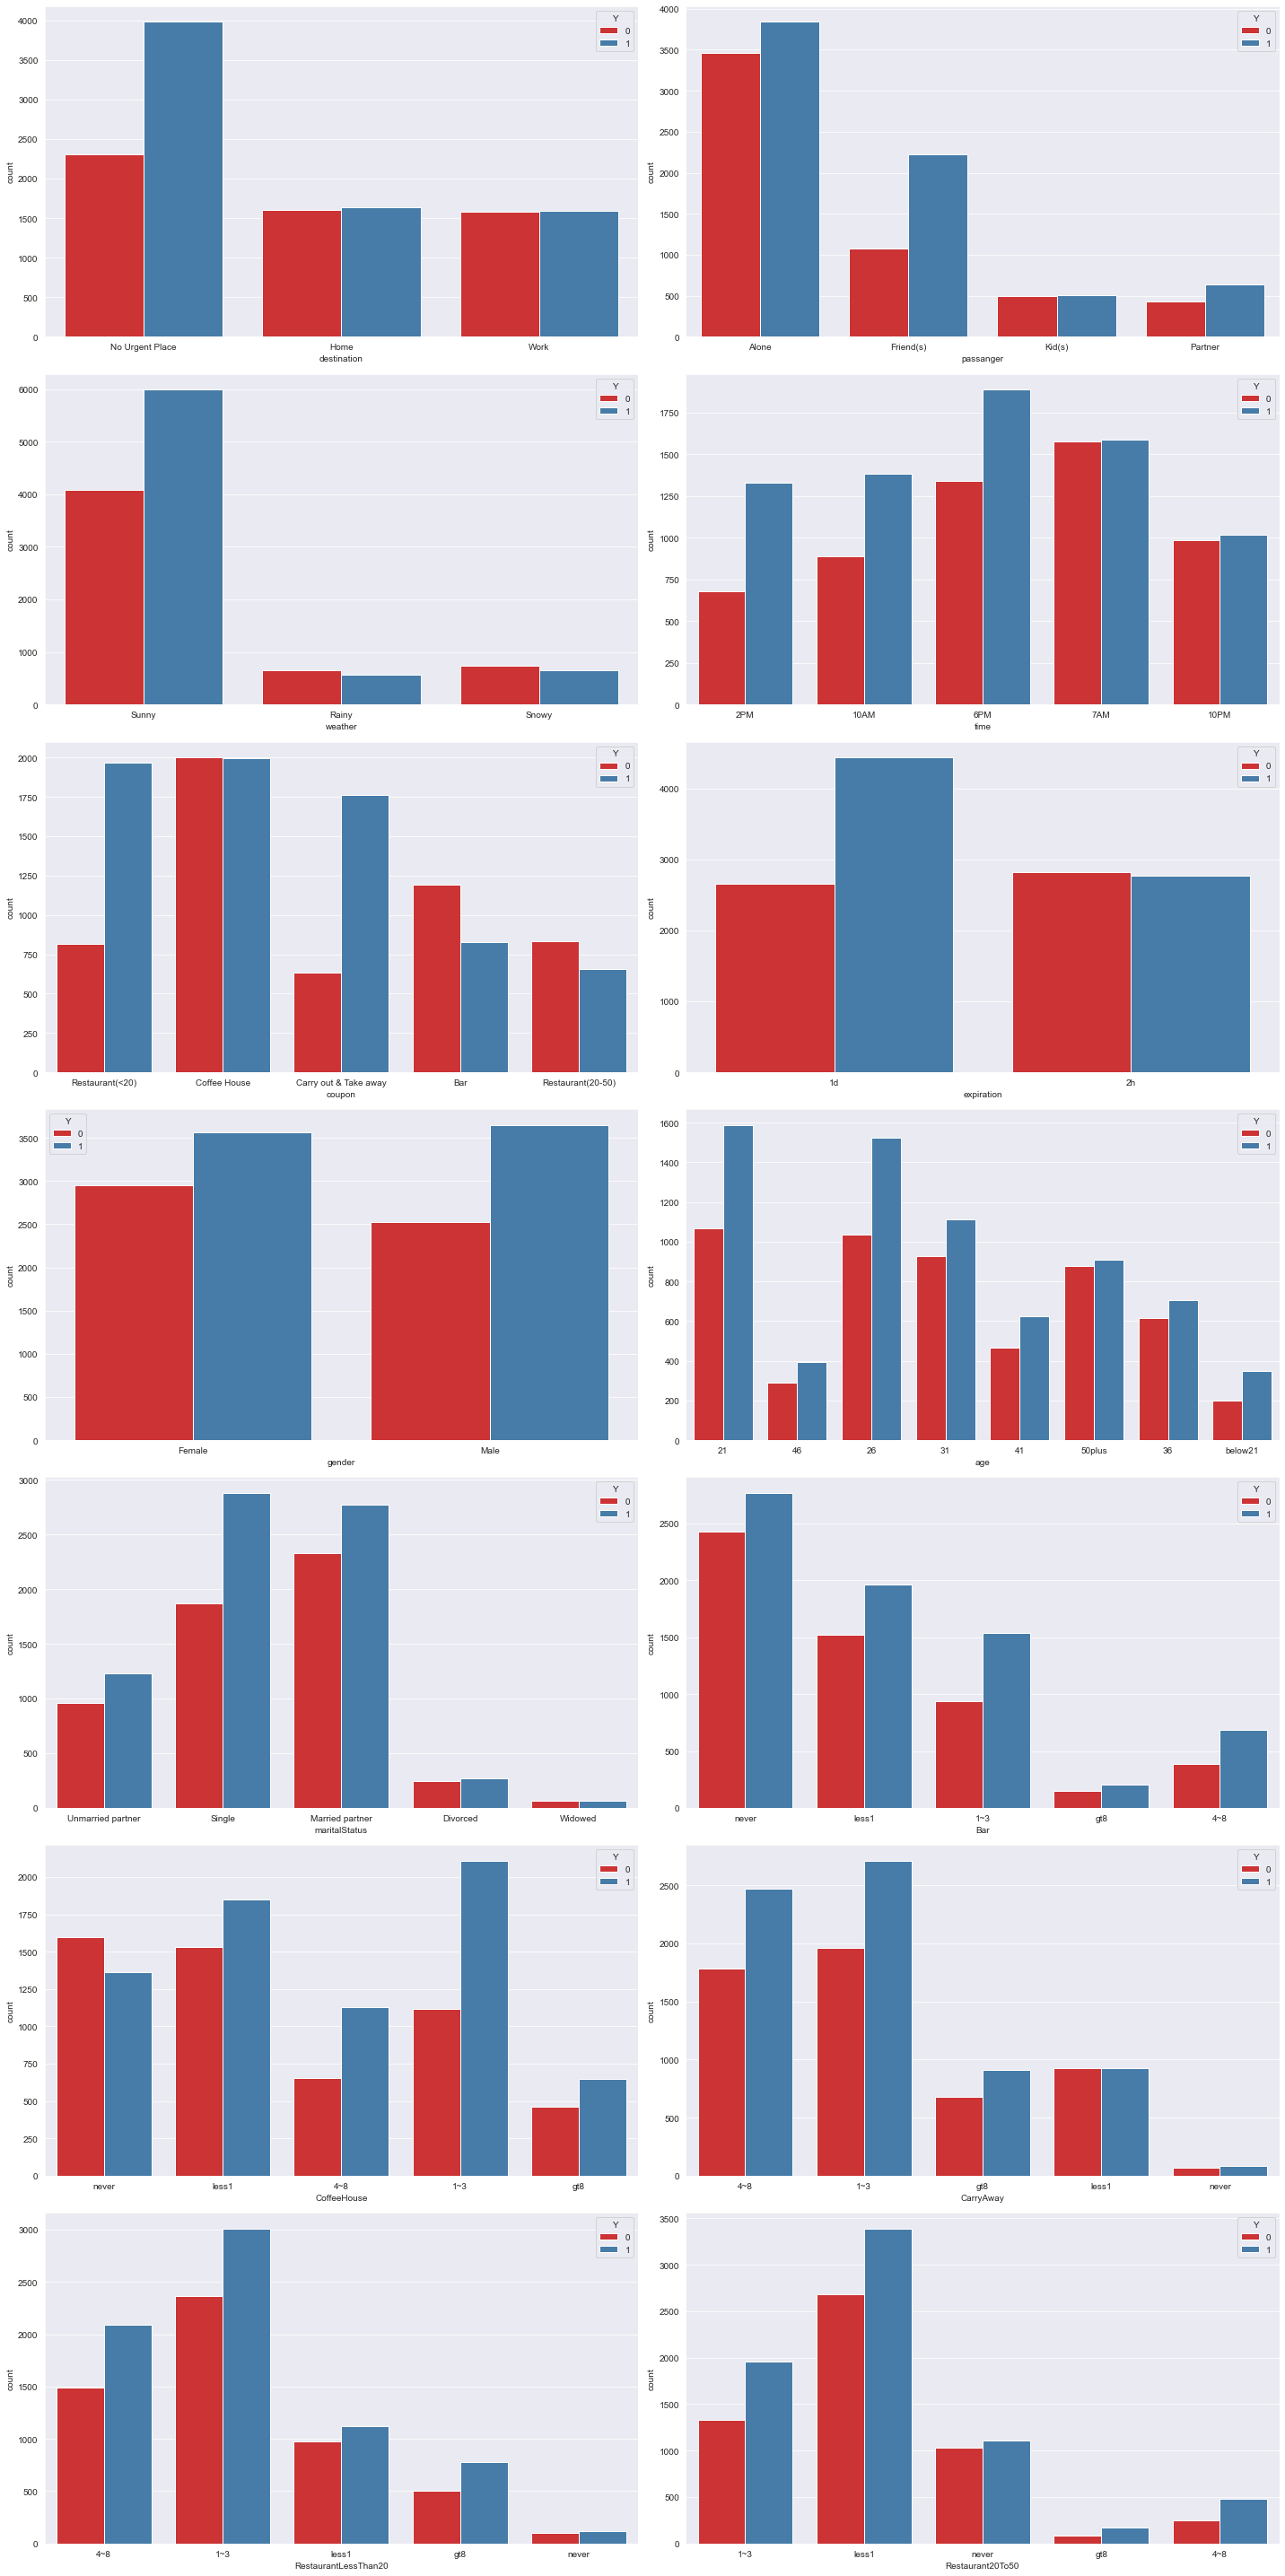

In [61]:
fig, axes = plt.subplots(7, 2, figsize=(20, 40))

for ax, col in zip(axes.flatten(), ['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration',
                                    'gender', 'age','maritalStatus','Bar', 'CoffeeHouse',
                                    'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50' ]):
    
    sns.set_style("darkgrid")
    sns.countplot(x=col, hue='Y', data=data, ax=ax, palette="Set1")
    
plt.tight_layout()
plt.show()
fig.savefig('clmswithY.png')
#education and income 


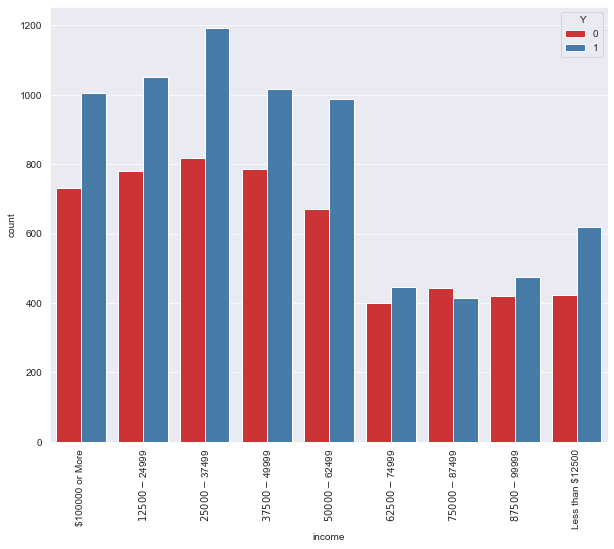

In [62]:
data_sort = data.sort_values('income')
fig, axes = plt.subplots(1, 1, figsize=(10, 8))
sns.set_style("darkgrid")
plt.xticks(rotation=90)
ax = sns.countplot(x="income", hue="Y", data= data_sort, palette = "Set1")


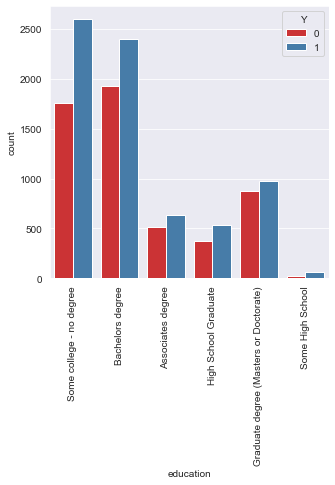

In [63]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
plt.xticks(rotation=90)
ax = sns.countplot(x="education", hue="Y", data= data, palette = "Set1")
sns.set_style("darkgrid")


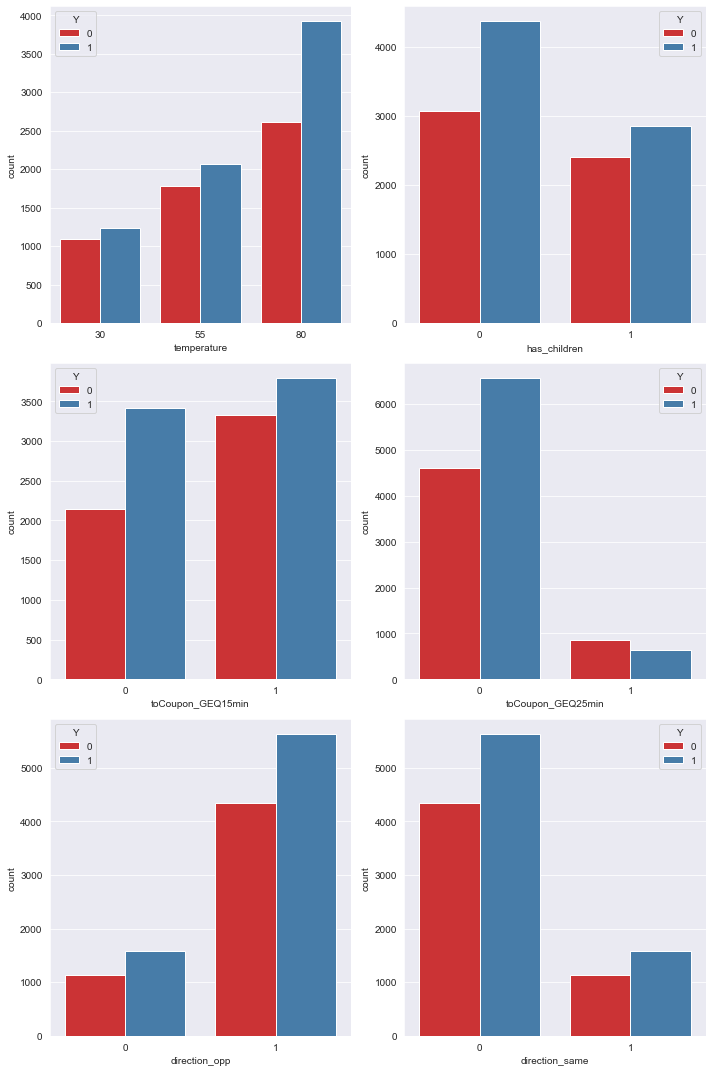

In [64]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

for ax, col in zip(axes.flatten(), ['temperature', 'has_children', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_opp',
                                    'direction_same']):
    sns.countplot(x=col, hue = 'Y', data=data, ax=ax, palette="Set1")
    
plt.tight_layout()
plt.show()
fig.savefig('clmswithY1.png')

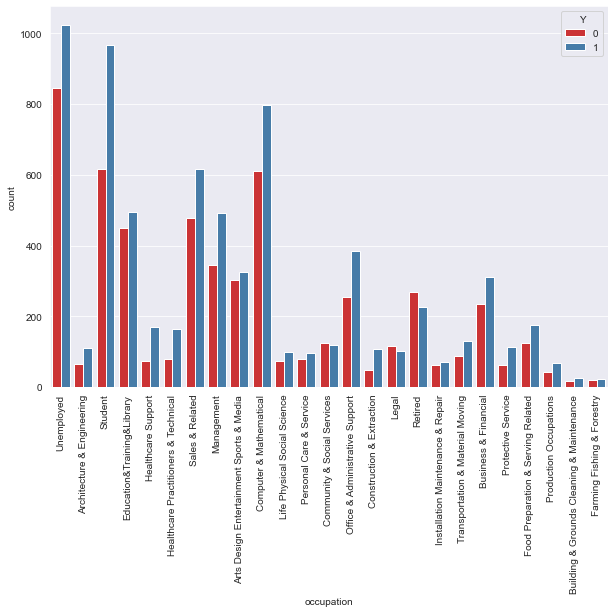

In [65]:
fig, axes = plt.subplots(1, 1, figsize=(10, 7))
plt.xticks(rotation=90)
ax = sns.countplot(x="occupation", hue="Y", data= data, palette = "Set1")
sns.set_style("darkgrid")

In [66]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,1,0


In [67]:
data.describe()


,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Corellarion Plot for Numeric Values 

#### Correlation matrix explains how one variable is related to other variables in the data. Simply explained, if two variable having the same kind of information, then the correlation between them will be high. 

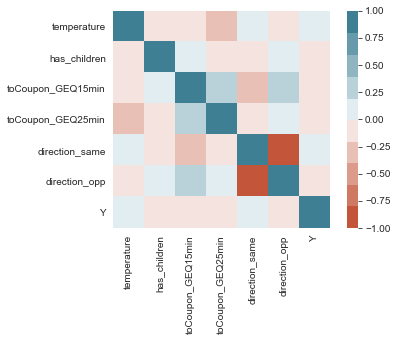

In [68]:
corr = data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=10),square= True)

#### We can see from the correlation plot that the correlation between direction_same and direction_opp is high. This indicate that they are explaining the same information. We can drop one variable. 
 

#### Dropping direction_opp variable  

In [69]:
data.drop(columns=['direction_opp'], inplace=True)

In [70]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,NaN,4~8,1~3,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,NaN,4~8,1~3,0,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

### Feature Engineering  

#### There are two more features  "toCoupon_GEQ15min" and "toCoupon_GEQ25min". They say the information about the distance from the restaturant which is greate than 5 mins and less than 15 mins other is 15 to 25 mins and greater than 25 mins. Instead of having two different varaibles for this we can crete one variable called distance. 

In [72]:
data['distance'] = None
data.loc[data['toCoupon_GEQ15min'] == 0, 'distance'] = 0
data.loc[(data['toCoupon_GEQ15min'] == 1) & \
             (data['toCoupon_GEQ25min'] == 0), 'distance'] = 1
data.loc[data['toCoupon_GEQ25min'] == 1, 'distance'] = 2

In [73]:
data.distance = data.distance.astype('int64')
data.distance.unique()
data.distance.value_counts()/len(data.distance)*100

1    44.236834
0    43.850520
2    11.912646
Name: distance, dtype: float64

In [74]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y,distance
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,0,0,0,1,0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,0,0,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,0,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,0,1


#### Now we can drop these two columns: toCoupon_GEQ15min and toCoupon_GEQ25min 

In [75]:
data.drop(columns=['toCoupon_GEQ15min', 'toCoupon_GEQ25min'], inplace=True)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [77]:
data.has_children = data.has_children.astype(str)
data.direction_same = data.direction_same.astype(str)

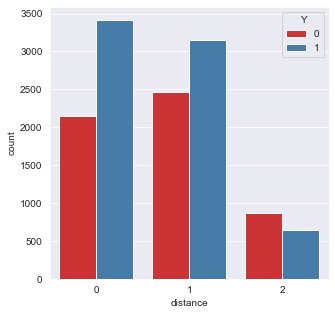

In [78]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
#plt.xticks(rotation=90)
ax = sns.countplot(x="distance", hue="Y", data= data, palette = "Set1")
sns.set_style("darkgrid")

In [79]:
data.shape

(12684, 22)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  object
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [81]:
for col in data.select_dtypes(include="object").columns:
    data[col] = data[col].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12684 non-null  category
 1   passanger             12684 non-null  category
 2   weather               12684 non-null  category
 3   temperature           12684 non-null  int64   
 4   time                  12684 non-null  category
 5   coupon                12684 non-null  category
 6   expiration            12684 non-null  category
 7   gender                12684 non-null  category
 8   age                   12684 non-null  category
 9   maritalStatus         12684 non-null  category
 10  has_children          12684 non-null  category
 11  education             12684 non-null  category
 12  occupation            12684 non-null  category
 13  income                12684 non-null  category
 14  Bar                   12577 non-null  category
 15  Co

In [82]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,Y,distance
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,0,1,0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,0,0,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,0,0,1


In [83]:
data_df = pd.DataFrame(data, columns=[])
dum_df = pd.get_dummies(data, columns=['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration',
                                       'gender','age', 'maritalStatus', 'has_children', 'education', 'occupation','income',
                                      'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
                                       'direction_same','distance'] )
data_df = dum_df
data_df.head()

,Y,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,...,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,direction_same_0,direction_same_1,distance_0,distance_1,distance_2
0,1,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,1,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [84]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Columns: 113 entries, Y to distance_2
dtypes: int64(1), uint8(112)
memory usage: 1.5 MB


In [85]:
df = pd.DataFrame(data_df.columns)
df

,0
0,Y
1,destination_Home
2,destination_No Urgent Place
3,destination_Work
4,passanger_Alone
...,...
108,direction_same_0
109,direction_same_1
110,distance_0
111,distance_1


### Splitting Data into Train and Test  

In [86]:
RANDOM_SEED = 1234
np.random.seed(RANDOM_SEED)

In [87]:
x = data_df.drop(columns=['Y'])
y = data_df.Y
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=RANDOM_SEED, test_size=0.3)

In [88]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Logistic Regression 

### Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.We can call a Logistic Regression a Linear Regression model but the Logistic Regression uses a more complex cost function, this cost function can be defined as the ‘Sigmoid function’ or also known as the ‘logistic function’ instead of a linear function.

In [78]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
LR = LR.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_LR = LR.predict(x_test)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [79]:
print(classification_report(y_test, y_pred_LR))


              precision    recall  f1-score   support

           0       0.64      0.56      0.60      1615
           1       0.70      0.76      0.73      2191

    accuracy                           0.68      3806
   macro avg       0.67      0.66      0.67      3806
weighted avg       0.68      0.68      0.68      3806



#### Confusion Matrix: 
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

In [80]:
matrix_LR = confusion_matrix(y_test, y_pred_LR)
print(matrix_LR)

[[ 910  705]
 [ 516 1675]]


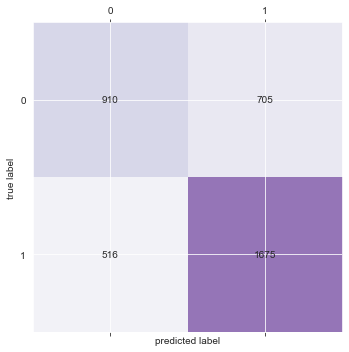

In [81]:
#confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(matrix_LR, cmap= 'Purples', alpha=0.5)
for i in range(matrix_LR.shape[0]):
    for j in range(matrix_LR.shape[1]):
        ax.text(x=j, y=i, s=matrix_LR[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

In [82]:
importances_LR = pd.DataFrame(data={'Attribute': x_train.columns,'Importance': LR.coef_[0]})
importances_LR = importances_LR.sort_values(by='Importance', ascending= True)

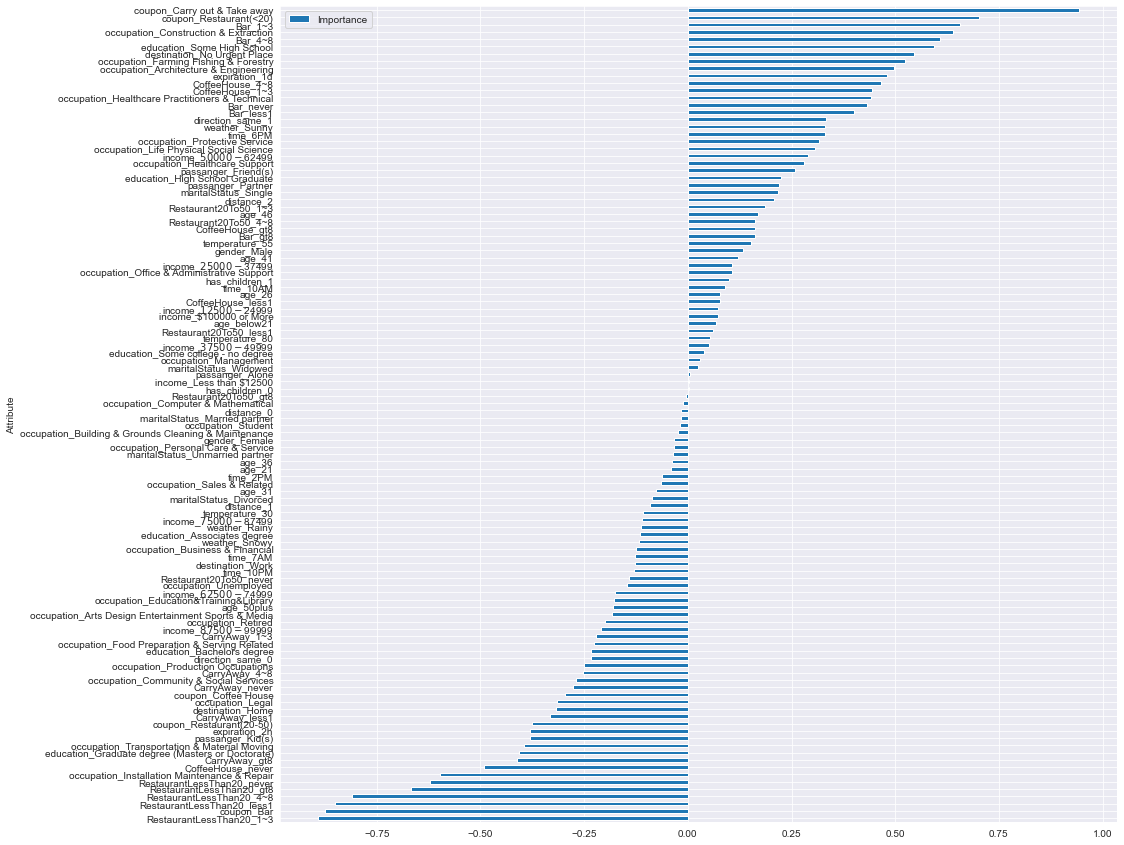

,Attribute,Importance
97,RestaurantLessThan20_1~3,-0.890524
18,coupon_Bar,-0.875508
100,RestaurantLessThan20_less1,-0.850302
98,RestaurantLessThan20_4~8,-0.808635
99,RestaurantLessThan20_gt8,-0.667357


In [83]:
ax = importances_LR.plot.barh(x='Attribute', y='Importance', figsize = (15,15))
plt.show()
importances_LR.head()


In [84]:
importances_LR.tail()

,Attribute,Importance
83,Bar_4~8,0.608606
54,occupation_Construction & Extraction,0.638819
82,Bar_1~3,0.655573
22,coupon_Restaurant(<20),0.702600
19,coupon_Carry out & Take away,0.944164


# Decision Tree Classifier 

### It is a flowchart like structure in which each internal node represent a test on a feature, each leaf node represent a class label (decision taken after computing all features).  In decision analysis, a decision tree can be used to visually and explicitly represent decisions and decision making. As the name goes, it uses a tree-like model of decisions.

In [85]:
DTC = DecisionTreeClassifier()
DTC = DTC.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_DTC = DTC.predict(x_test)

In [86]:
print(classification_report(y_test, y_pred_DTC))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63      1615
           1       0.73      0.71      0.72      2191

    accuracy                           0.68      3806
   macro avg       0.67      0.67      0.67      3806
weighted avg       0.68      0.68      0.68      3806



In [87]:
matrix_DTC = confusion_matrix(y_test, y_pred_DTC)
print(matrix_DTC)

[[1034  581]
 [ 640 1551]]


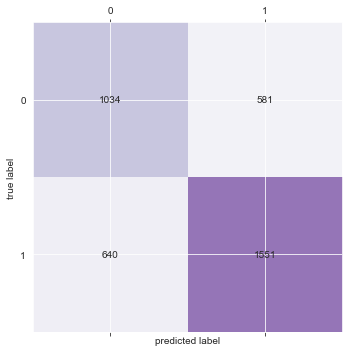

In [88]:
#confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(matrix_DTC, cmap= 'Purples', alpha=0.5)
for i in range(matrix_DTC.shape[0]):
    for j in range(matrix_DTC.shape[1]):
        ax.text(x=j, y=i, s=matrix_DTC[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

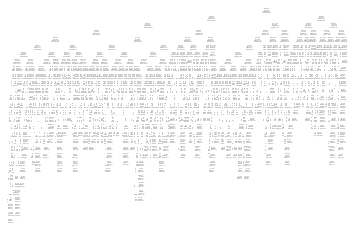

In [91]:
from sklearn import tree
fig = tree.plot_tree(DTC);

In [93]:
importances_DTC = pd.DataFrame(data={'Attribute': x_train.columns,'Importance': DTC.feature_importances_})
importances_DTC = importances_DTC.sort_values(by='Importance', ascending= True)

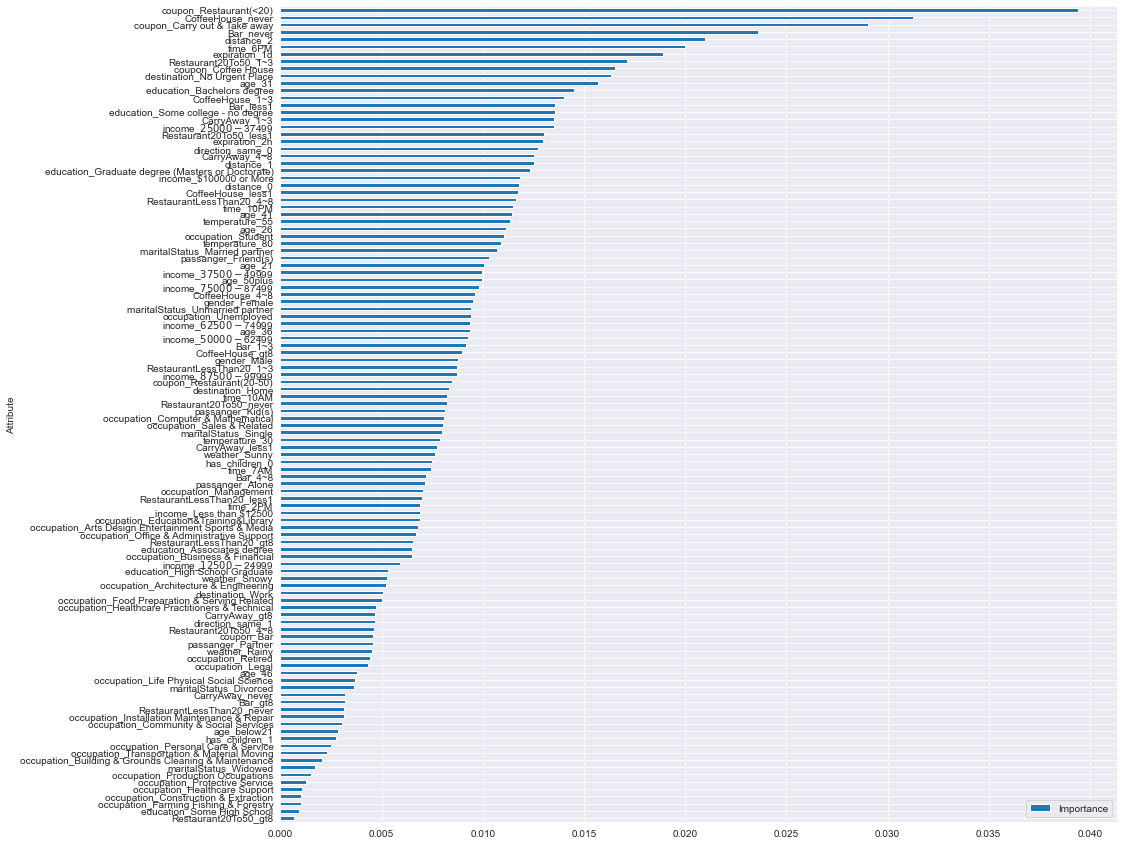

In [94]:
ax = importances_DTC.plot.barh(x='Attribute', y='Importance', figsize = (15,15))
plt.show()

In [95]:
importances_DTC.head()

,Attribute,Importance
104,Restaurant20To50_gt8,0.000657
46,education_Some High School,0.000927
56,occupation_Farming Fishing & Forestry,0.001000
54,occupation_Construction & Extraction,0.001026
59,occupation_Healthcare Support,0.001088


In [100]:
importances_DTC.tail(10)

,Attribute,Importance
1,destination_No Urgent Place,0.016355
20,coupon_Coffee House,0.016515
102,Restaurant20To50_1~3,0.017105
23,expiration_1d,0.018881
16,time_6PM,0.019969
111,distance_2,0.020994
86,Bar_never,0.023587
19,coupon_Carry out & Take away,0.029017
91,CoffeeHouse_never,0.031251
22,coupon_Restaurant(<20),0.039391


# RF

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
RF = RandomForestClassifier(n_estimators=100)
RF = RF.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_RF = RF.predict(x_test)

In [103]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.73      0.66      0.69      1615
           1       0.76      0.82      0.79      2191

    accuracy                           0.75      3806
   macro avg       0.75      0.74      0.74      3806
weighted avg       0.75      0.75      0.75      3806



In [104]:
matrix_RF = confusion_matrix(y_test, y_pred_RF)
print(matrix_RF)

[[1060  555]
 [ 392 1799]]


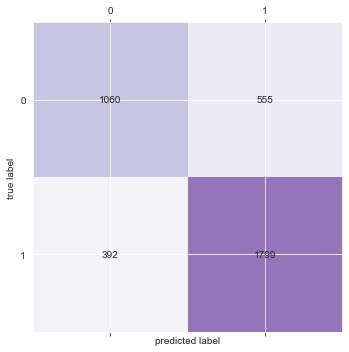

In [94]:
#confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(matrix_RF, cmap= 'Purples', alpha=0.5)
for i in range(matrix_RF.shape[0]):
    for j in range(matrix_RF.shape[1]):
        ax.text(x=j, y=i, s=matrix_RF[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

In [107]:
importances_RF = pd.DataFrame(data={'Attribute': x_train.columns,'Importance': RF.feature_importances_})
importances_RF = importances_RF.sort_values(by='Importance', ascending= True)

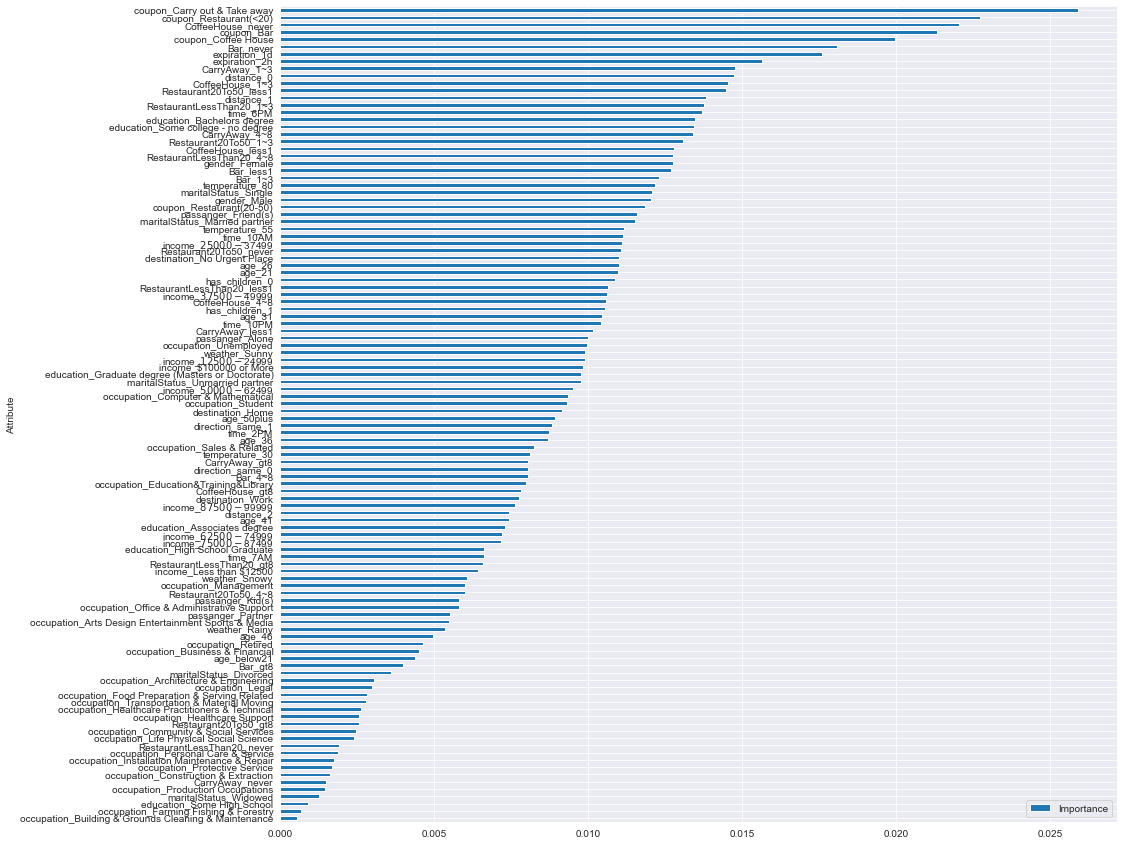

In [108]:
ax = importances_RF.plot.barh(x='Attribute', y='Importance', figsize = (15,15))
plt.show()

In [109]:
importances_RF.tail()

,Attribute,Importance
20,coupon_Coffee House,0.019981
18,coupon_Bar,0.021328
91,CoffeeHouse_never,0.022054
22,coupon_Restaurant(<20),0.022729
19,coupon_Carry out & Take away,0.025896


# KNN

In [99]:
KNN = KNeighborsClassifier()
KNN = KNN.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_KNN = KNN.predict(x_test)

In [100]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.61      0.56      0.58      1615
           1       0.69      0.74      0.71      2191

    accuracy                           0.66      3806
   macro avg       0.65      0.65      0.65      3806
weighted avg       0.66      0.66      0.66      3806

Test accuracy:
0.6607987388334209
Training accuracy:
0.792070286100473


In [102]:
matrix_KNN = confusion_matrix(y_test, y_pred_KNN)
print(matrix_KNN)

[[ 902  713]
 [ 578 1613]]


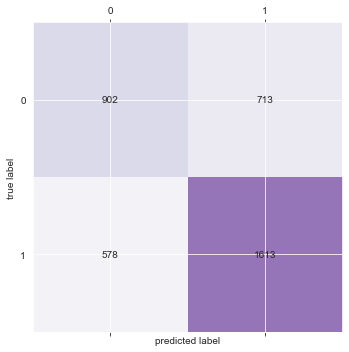

In [103]:
#confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(matrix_KNN, cmap= 'Purples', alpha=0.5)
for i in range(matrix_KNN.shape[0]):
    for j in range(matrix_KNN.shape[1]):
        ax.text(x=j, y=i, s=matrix_KNN[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

# Gaussian NB

In [104]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [105]:
GNB = GaussianNB().fit(x_train, y_train)

#Predict the response for test dataset
y_pred_GNB = GNB.predict(x_test)

In [106]:
print(classification_report(y_test, y_pred_GNB))

              precision    recall  f1-score   support

           0       0.55      0.63      0.59      1615
           1       0.69      0.61      0.65      2191

    accuracy                           0.62      3806
   macro avg       0.62      0.62      0.62      3806
weighted avg       0.63      0.62      0.62      3806

Test accuracy:
0.6219127693116132
Training accuracy:
0.6353908537959


In [112]:
matrix_GNB = confusion_matrix(y_test, y_pred_GNB)
print(matrix_GNB)

[[1022  593]
 [ 846 1345]]


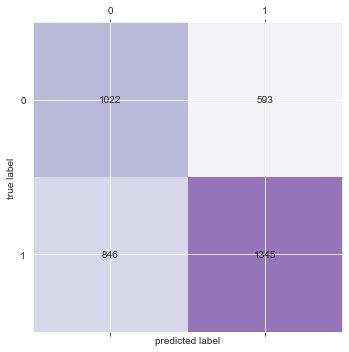

In [113]:
#confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(matrix_GNB, cmap= 'Purples', alpha=0.5)
for i in range(matrix_GNB.shape[0]):
    for j in range(matrix_GNB.shape[1]):
        ax.text(x=j, y=i, s=matrix_GNB[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

# SVM

In [89]:
SVM = SVC(kernel="rbf", random_state=None, probability=True, cache_size=500, gamma=0.1)
SVM = SVM.fit(x_train, y_train)
#Predict the response for test dataset
y_pred_SVM = SVM.predict(x_test)

In [90]:
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70      1615
           1       0.77      0.83      0.80      2191

    accuracy                           0.76      3806
   macro avg       0.75      0.75      0.75      3806
weighted avg       0.76      0.76      0.76      3806



In [91]:
matrix_SVM = confusion_matrix(y_test, y_pred_SVM)
print(matrix_SVM)

[[1068  547]
 [ 373 1818]]


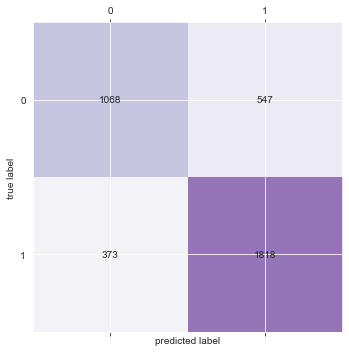

In [92]:
#confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(matrix_SVM, cmap= 'Purples', alpha=0.5)
for i in range(matrix_SVM.shape[0]):
    for j in range(matrix_SVM.shape[1]):
        ax.text(x=j, y=i, s=matrix_SVM[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

# SVM with Linear Kernal 

In [93]:
SVM2 = SVC(kernel="linear", random_state=None, probability=True, cache_size=500, gamma=0.1)
SVM2 = SVM2.fit(x_train, y_train)
#Predict the response for test dataset
y_pred_SVM2 = SVM2.predict(x_test)

In [94]:
print(classification_report(y_test, y_pred_SVM2))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61      1615
           1       0.71      0.76      0.74      2191

    accuracy                           0.68      3806
   macro avg       0.68      0.67      0.67      3806
weighted avg       0.68      0.68      0.68      3806



In [95]:
matrix_SVM2 = confusion_matrix(y_test, y_pred_SVM2)
print(matrix_SVM2)

[[ 935  680]
 [ 519 1672]]


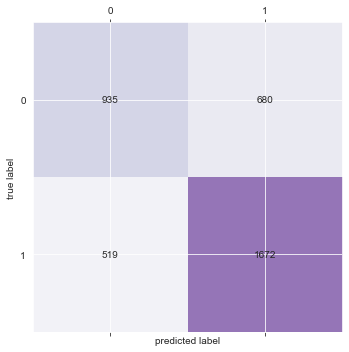

In [96]:
#confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(matrix_SVM2, cmap= 'Purples', alpha=0.5)
for i in range(matrix_SVM2.shape[0]):
    for j in range(matrix_SVM2.shape[1]):
        ax.text(x=j, y=i, s=matrix_SVM2[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

In [98]:
importances = pd.DataFrame(data={'Attribute': x_train.columns,'Importance': SVM2.coef_[0]})
importances = importances.sort_values(by='Importance', ascending= True)

In [99]:
importances.head()

,Attribute,Importance
18,coupon_Bar,-0.938034
97,RestaurantLessThan20_1~3,-0.897896
98,RestaurantLessThan20_4~8,-0.833737
100,RestaurantLessThan20_less1,-0.826018
101,RestaurantLessThan20_never,-0.751443


In [100]:
importances.tail()

,Attribute,Importance
56,occupation_Farming Fishing & Forestry,0.561532
83,Bar_4~8,0.572290
82,Bar_1~3,0.583971
22,coupon_Restaurant(<20),0.621231
19,coupon_Carry out & Take away,0.958971


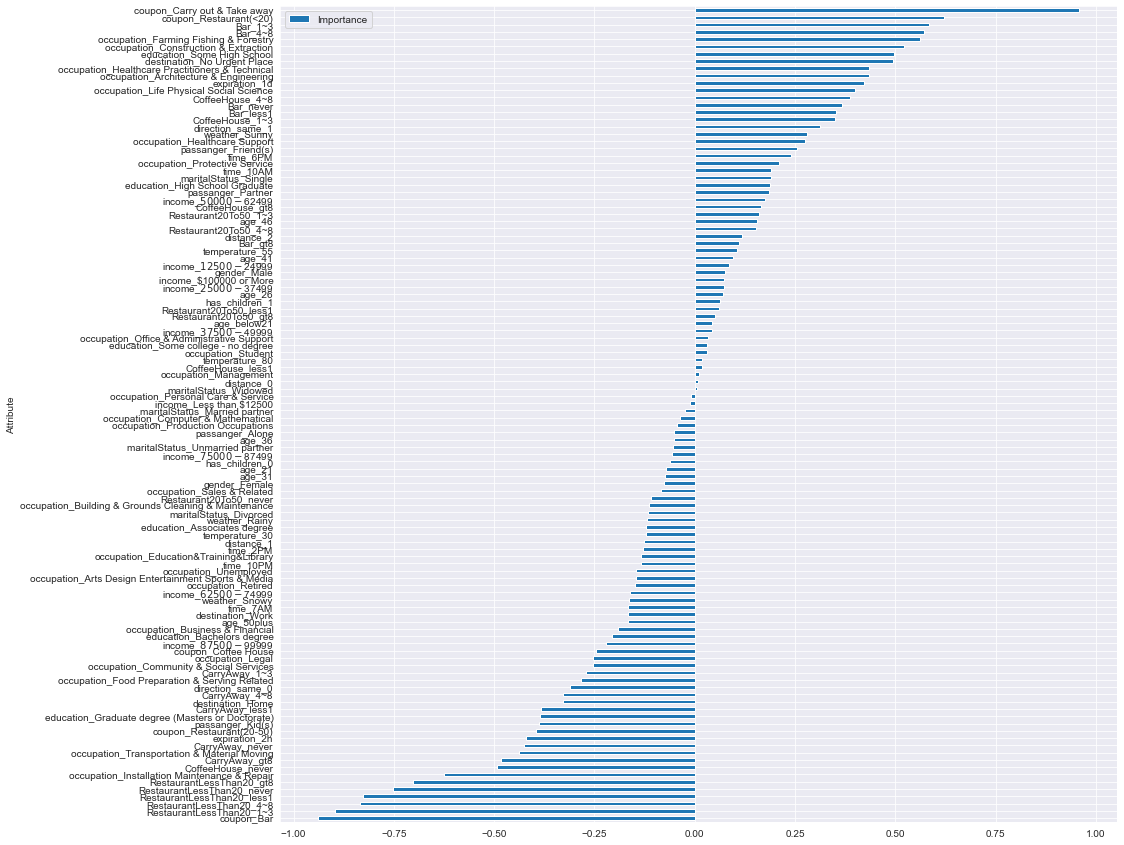

In [122]:
ax = importances.plot.barh(x='Attribute', y='Importance', figsize = (15,15))
plt.show()

#### K fold cross validation

In [132]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [133]:
k = 10
kf = KFold(n_splits=k, random_state=None)
model = LR
acc_score = []

In [134]:
for train_index , test_index in kf.split(x):
    x_train , x_test = x.iloc[train_index,:],x.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    
    model.fit(x_train,y_train)
    pred_values = model.predict(x_test)
    
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver

accuracy of each fold - [0.6619385342789598, 0.6926713947990544, 0.706855791962175, 0.6895193065405831, 0.6198738170347003, 0.667192429022082, 0.6411671924290221, 0.6577287066246057, 0.6861198738170347, 0.667192429022082]
Avg accuracy : 0.6690259475530299


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [202]:
k = 10
kf = KFold(n_splits=k, random_state=None)
model = DTC
acc_score = []

In [203]:
for train_index , test_index in kf.split(x):
    x_train , x_test = x.iloc[train_index,:],x.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    
    model.fit(x_train,y_train)
    pred_values = model.predict(x_test)
    
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.6304176516942475, 0.6438140267927502, 0.6438140267927502, 0.640661938534279, 0.6009463722397477, 0.610410094637224, 0.6017350157728707, 0.5914826498422713, 0.5883280757097792, 0.5977917981072555]
Avg accuracy : 0.6149401650123176


In [135]:
k = 10
kf = KFold(n_splits=k, random_state=None)
model = KNN
acc_score = []

In [136]:
for train_index , test_index in kf.split(x):
    x_train , x_test = x.iloc[train_index,:],x.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    
    model.fit(x_train,y_train)
    pred_values = model.predict(x_test)
    
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.6832151300236406, 0.6579984239558707, 0.6745468873128447, 0.6477541371158393, 0.6356466876971609, 0.6080441640378549, 0.6309148264984227, 0.6206624605678234, 0.6577287066246057, 0.6419558359621451]
Avg accuracy : 0.6458467259796208


#### The Algorithms doesn't perform that great with K fold cross validation

# 80/20 Split 

In [137]:
RANDOM_SEED = 6473
np.random.seed(RANDOM_SEED)

In [138]:
x = data_df.drop(columns=['Y'])
y = data_df.Y
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=RANDOM_SEED, test_size=0.2)

### LR 

In [139]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
LR = LR.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_LR = LR.predict(x_test)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [141]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.66      0.58      0.61      1104
           1       0.70      0.77      0.73      1433

    accuracy                           0.68      2537
   macro avg       0.68      0.67      0.67      2537
weighted avg       0.68      0.68      0.68      2537



In [142]:
matrix_LR = confusion_matrix(y_test, y_pred_LR)
print(matrix_LR)

[[ 638  466]
 [ 335 1098]]


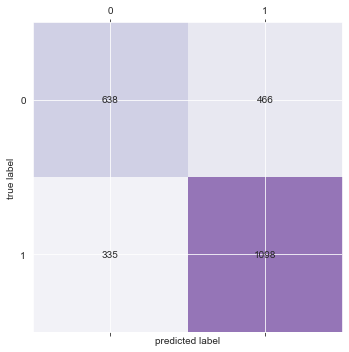

In [143]:
#confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(matrix_LR, cmap= 'Purples', alpha=0.5)
for i in range(matrix_LR.shape[0]):
    for j in range(matrix_LR.shape[1]):
        ax.text(x=j, y=i, s=matrix_LR[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

In [144]:
importances_LR = pd.DataFrame(data={'Attribute': x_train.columns,'Importance': LR.coef_[0]})
importances_LR = importances_LR.sort_values(by='Importance', ascending= True)

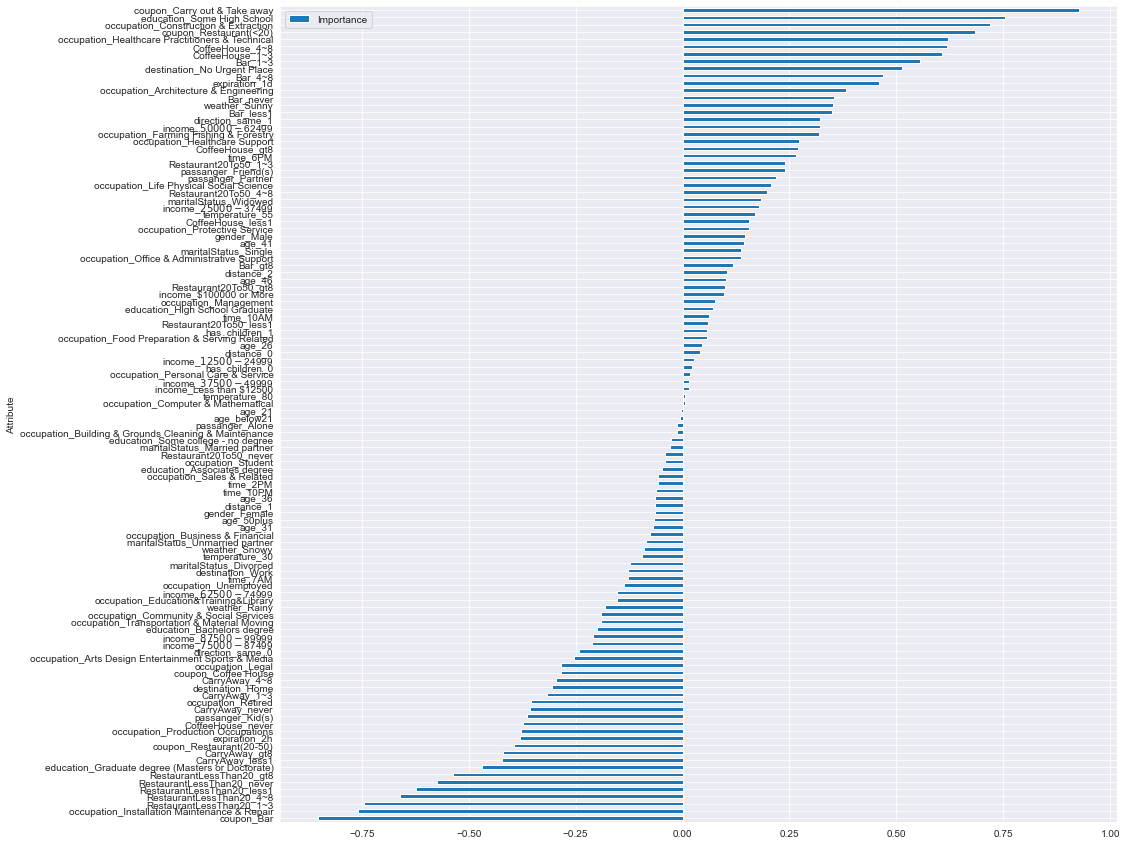

In [145]:
ax = importances_LR.plot.barh(x='Attribute', y='Importance', figsize = (15,15))
plt.show()

### DTC

In [146]:
DTC = DecisionTreeClassifier()
DTC = DTC.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_DTC = DTC.predict(x_test)

In [148]:
print(classification_report(y_test, y_pred_DTC))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      1104
           1       0.72      0.70      0.71      1433

    accuracy                           0.68      2537
   macro avg       0.68      0.68      0.68      2537
weighted avg       0.68      0.68      0.68      2537



In [149]:
matrix_DTC = confusion_matrix(y_test, y_pred_DTC)
print(matrix_DTC)

[[ 721  383]
 [ 424 1009]]


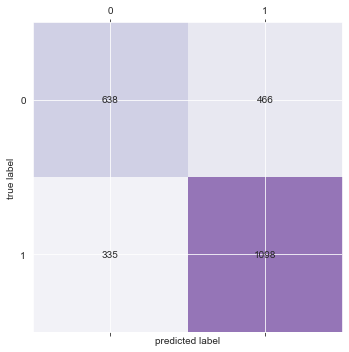

In [150]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(matrix_LR, cmap= 'Purples', alpha=0.5)
for i in range(matrix_LR.shape[0]):
    for j in range(matrix_LR.shape[1]):
        ax.text(x=j, y=i, s=matrix_LR[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

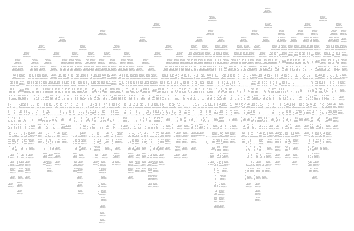

In [151]:
from sklearn import tree
tree.plot_tree(DTC);

In [153]:
importances_DTC = pd.DataFrame(data={'Attribute': x_train.columns,'Importance': DTC.feature_importances_})
importances_DTC = importances_DTC.sort_values(by='Importance', ascending= True)

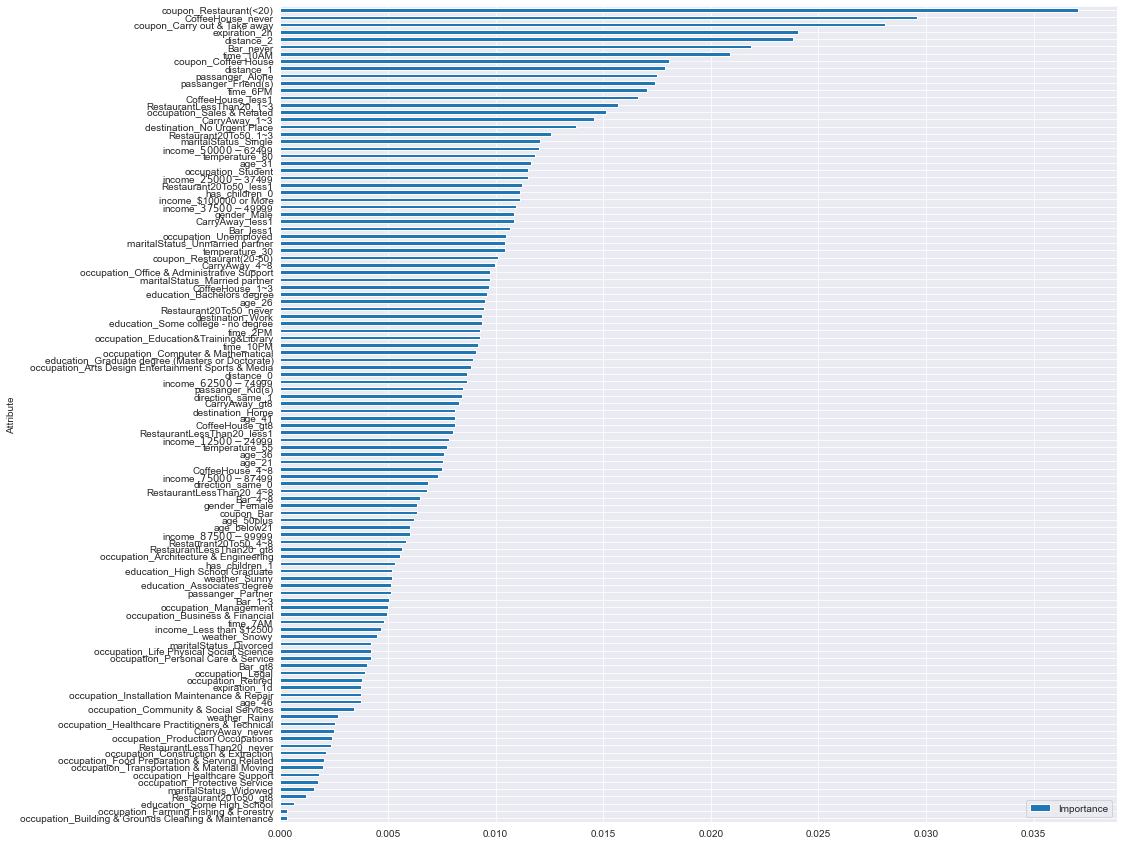

In [154]:
ax = importances_DTC.plot.barh(x='Attribute', y='Importance', figsize = (15,15))
plt.show()

In [155]:
RF = RandomForestClassifier(n_estimators=100)
RF = RF.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_RF = RF.predict(x_test)

In [156]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70      1104
           1       0.76      0.83      0.79      1433

    accuracy                           0.75      2537
   macro avg       0.75      0.74      0.74      2537
weighted avg       0.75      0.75      0.75      2537



In [157]:
matrix_RF = confusion_matrix(y_test, y_pred_RF)
print(matrix_RF)

[[ 719  385]
 [ 245 1188]]


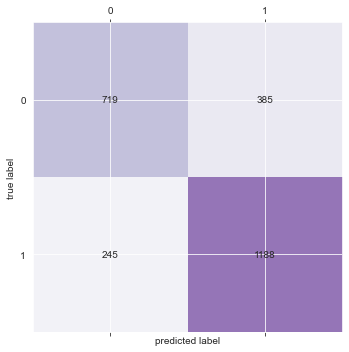

In [158]:
#confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(matrix_RF, cmap= 'Purples', alpha=0.5)
for i in range(matrix_RF.shape[0]):
    for j in range(matrix_RF.shape[1]):
        ax.text(x=j, y=i, s=matrix_RF[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

In [159]:
SVM = SVC(kernel="rbf", random_state=None, probability=True, cache_size=500, gamma=0.1)
SVM = SVM.fit(x_train, y_train)
#Predict the response for test dataset
y_pred_SVM = SVM.predict(x_test)

In [161]:
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70      1104
           1       0.75      0.83      0.79      1433

    accuracy                           0.75      2537
   macro avg       0.75      0.74      0.74      2537
weighted avg       0.75      0.75      0.75      2537



In [165]:
matrix_SVM2 = confusion_matrix(y_test, y_pred_SVM)
print(matrix_SVM2)

[[ 716  388]
 [ 239 1194]]


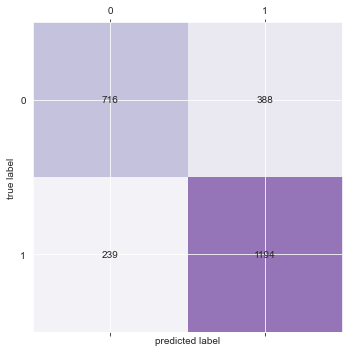

In [166]:
#confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(matrix_SVM2, cmap= 'Purples', alpha=0.5)
for i in range(matrix_SVM2.shape[0]):
    for j in range(matrix_SVM2.shape[1]):
        ax.text(x=j, y=i, s=matrix_SVM2[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

#### There is no much difference in the accuracy of the models even after 80/20 split. 

## Conclusion: The best model for this data set is SVM 